In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/description.pdf
/kaggle/input/diabetes/diabetic_data.csv


# 🏥 Hospital Readmission Risk Analysis  
### Healthcare Analytics using Python

📌 **Version:** v1.0 – Exploratory Readmission Risk Analysis  
📅 **Last Updated:** January 2026  
🛠️ **Tools:** Python, Pandas, NumPy, Matplotlib  
📊 **Dataset:** Diabetes 130-US Hospitals (1999–2008)


## 🎯 Objective

The objective of this project is to analyze hospital readmission patterns using
electronic health record (EHR) data and identify patient characteristics associated
with **30-day readmission risk**.

The goal is to generate **actionable insights** that can help healthcare providers
improve discharge planning and reduce avoidable readmissions.


## 📂 Dataset Overview

This dataset contains anonymized patient encounter records from U.S. hospitals
between **1999 and 2008**, focusing on diabetes-related admissions.

Each row represents a single hospital encounter and includes:
- Patient demographics
- Hospital utilization history
- Diagnostic information
- Medication usage
- Readmission outcome


## Dataset Loading

The dataset contains anonymized patient encounter records from U.S. hospitals (1999–2008) related to diabetes admissions.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/diabetes/diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape
df.size



5088300

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Missing Value Handling

Missing values in the dataset are represented using special symbols.
These are converted into proper missing values, and columns with excessive missing data are removed.


In [7]:
df.replace('?', np.nan, inplace=True)

missing_percent = df.isna().mean() * 100
cols_to_drop = missing_percent[missing_percent > 50].index

df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

df.isna().mean().sort_values(ascending=False).head(10)


medical_specialty           0.490822
payer_code                  0.395574
race                        0.022336
diag_3                      0.013983
diag_2                      0.003518
diag_1                      0.000206
gender                      0.000000
discharge_disposition_id    0.000000
admission_type_id           0.000000
time_in_hospital            0.000000
dtype: float64

## 🎯 Target Variable Creation

The original `readmitted` column contains three categories:
- `<30` : Readmitted within 30 days
- `>30` : Readmitted after 30 days
- `NO`  : No readmission

For analysis, the target variable was converted into a **binary outcome**:
- **1** → Readmission within 30 days
- **0** → No readmission within 30 days

This allows clear comparison of high-risk vs low-risk patient groups.


In [8]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [9]:
df['readmitted_binary'] = df['readmitted'].apply(
    lambda x: 1 if x == '<30' else 0
)


In [10]:
df['readmitted_binary'].value_counts()

readmitted_binary
0    90409
1    11357
Name: count, dtype: int64

In [11]:
df.drop(columns=['readmitted'], inplace=True)


## 🧩 Feature Selection

A focused subset of clinically relevant features was selected to improve
interpretability and analytical clarity.

Selected features include:
- Demographics (age, gender, race)
- Hospital utilization metrics
- Diagnostic codes
- Readmission outcome

This ensures the analysis remains **insight-driven** rather than overly complex.


In [12]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted_binary'],
      dtype='object')

In [13]:
selected_cols = [
    'age',
    'gender',
    'race',
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'diag_1',
    'diag_2',
    'diag_3',
    'readmitted_binary'
]

df = df[selected_cols]


In [14]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 101766 non-null  object
 1   gender              101766 non-null  object
 2   race                99493 non-null   object
 3   time_in_hospital    101766 non-null  int64 
 4   num_lab_procedures  101766 non-null  int64 
 5   num_procedures      101766 non-null  int64 
 6   num_medications     101766 non-null  int64 
 7   number_outpatient   101766 non-null  int64 
 8   number_emergency    101766 non-null  int64 
 9   number_inpatient    101766 non-null  int64 
 10  diag_1              101745 non-null  object
 11  diag_2              101408 non-null  object
 12  diag_3              100343 non-null  object
 13  readmitted_binary   101766 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 10.9+ MB


In [15]:
df['readmitted_binary'].mean()

np.float64(0.11159915885462728)

In [16]:
age_readmission = df.groupby('age')['readmitted_binary'].mean().sort_index()
age_readmission

age
[0-10)      0.018634
[10-20)     0.057887
[20-30)     0.142426
[30-40)     0.112318
[40-50)     0.106040
[50-60)     0.096662
[60-70)     0.111284
[70-80)     0.117731
[80-90)     0.120835
[90-100)    0.110992
Name: readmitted_binary, dtype: float64

## Exploratory Data Analysis

Exploratory analysis is performed to identify patterns and trends associated with hospital readmission risk.  
Visualizations are used to compare readmission rates across different patient groups.


### Readmission Rate by Age Group


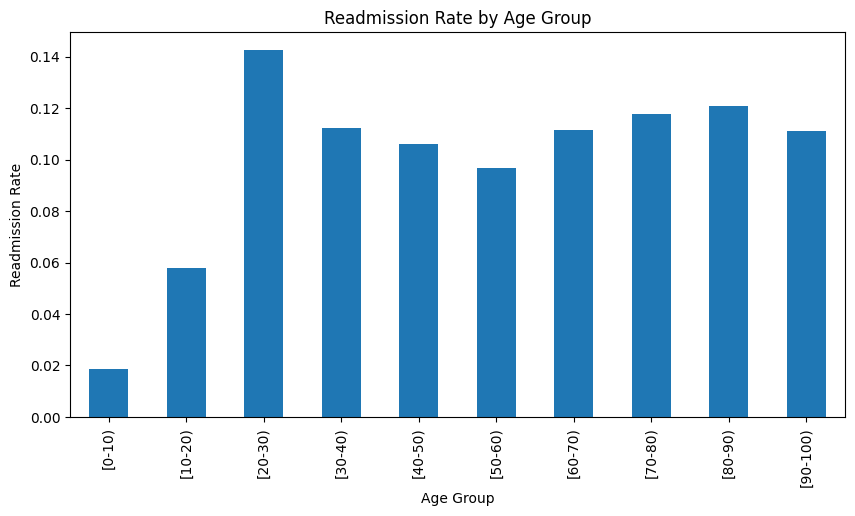

In [17]:
import matplotlib.pyplot as plt

age_readmission.plot(kind='bar', figsize=(10,5))
plt.title('Readmission Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate')
plt.show()


In [18]:
df.groupby('number_inpatient')['readmitted_binary'].mean().head(10)


number_inpatient
0    0.084371
1    0.129245
2    0.174333
3    0.202873
4    0.236128
5    0.314039
6    0.345833
7    0.354478
8    0.443709
9    0.423423
Name: readmitted_binary, dtype: float64

In [19]:
df.loc[:,'inpatient_bin'] = pd.cut(
    df['number_inpatient'],
    bins=[-1, 0, 2, 5, 100],
    labels=['0 visits', '1–2 visits', '3–5 visits', '6+ visits']
)


In [20]:
df[['number_inpatient', 'inpatient_bin']].head()


,number_inpatient,inpatient_bin
0,0,0 visits
1,0,0 visits
2,1,1–2 visits
3,0,0 visits
4,0,0 visits


### Readmission Rate by Prior Inpatient Visits


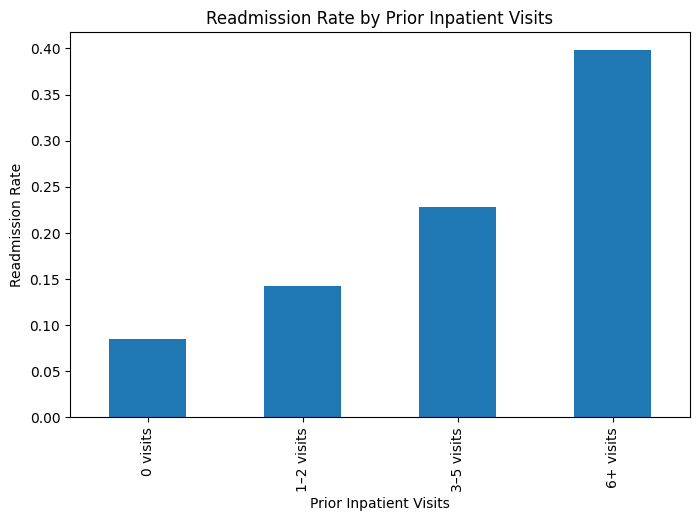

In [21]:
inpatient_readmission = (
    df.groupby('inpatient_bin', observed=True)['readmitted_binary']
      .mean()
)

inpatient_readmission.plot(kind='bar', figsize=(8,5))
plt.title('Readmission Rate by Prior Inpatient Visits')
plt.xlabel('Prior Inpatient Visits')
plt.ylabel('Readmission Rate')
plt.show()


In [22]:
gender_readmission = (
    df.groupby('gender', observed=True)['readmitted_binary']
      .mean()
)
gender_readmission


gender
Female             0.112452
Male               0.110615
Unknown/Invalid    0.000000
Name: readmitted_binary, dtype: float64

### Readmission Rate by Gender


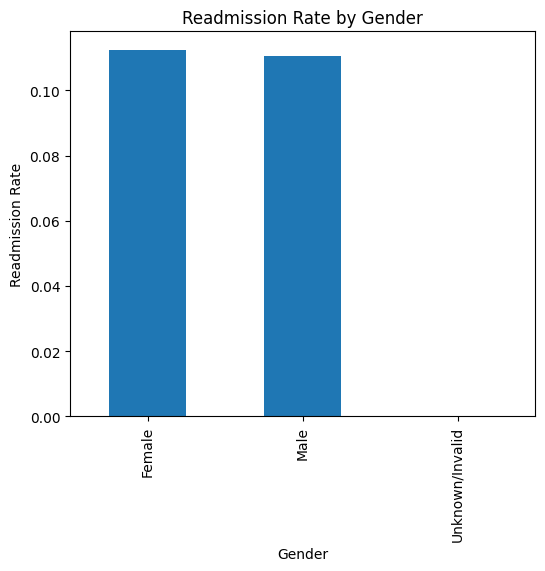

In [23]:
gender_readmission.plot(kind='bar', figsize=(6,5))
plt.title('Readmission Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Readmission Rate')
plt.show()


## 🧠 Key Insights

- Readmission risk increases with patient age, particularly among older age groups
- Patients with frequent prior inpatient visits show significantly higher
  readmission rates
- Gender alone does not strongly influence 30-day readmission outcomes

## ✅ Conclusion

This analysis highlights the importance of **age and hospital utilization history**
in predicting readmission risk.

The findings demonstrate how exploratory healthcare analytics can support
**data-driven decision-making**, helping providers identify high-risk patients
and improve discharge planning strategies.
